In [1]:
from cmp import main
from matplotlib import pyplot as plt

In [2]:
colors = {
    "python": "#008b8b",
    "python2": "#004b4b",
    "pypy": "#008b8b",
    "nuitka": "#7fff00",
    "cython": "#ffa500",
    "cython_with_types": "#ef9500",
    "c++": "pink",
    "java": "brown",
    "lisp": "cyan",
    "clisp": "cyan",
}

In [3]:
results = main()

{'data': [('c++', 0.005674020045221189),
          ('cython', 0.025274604558944702),
          ('cython_with_types', 0.026111119832748022),
          ('java', 0.08097263482900766),
          ('lisp', 0.012411879904476213),
          ('nuitka', 0.0536881497031764),
          ('python', 0.03553064116116228),
          ('python2', 0.01696723194445594)],
 'program': 'hello_world'}
{'data': [('c++', 0.01031585083794348),
          ('cython', 0.1957749923070272),
          ('cython_with_types', 0.15974790709359304),
          ('java', 0.08342899878819783),
          ('lisp', 0.04326362411181132),
          ('nuitka', 0.25516146421432495),
          ('python', 0.43726452191670734),
          ('python2', 0.36187903086344403)],
 'program': 'fibonacci'}


In [4]:
def plot_result(program, data):
    plt.title('program: %s' % program)
    plt.barh([d[0] for d in data], width=[d[1] for d in data], color=[colors[d[0]] for d in data], )
    plt.xlabel('seconds')
    plt.show()

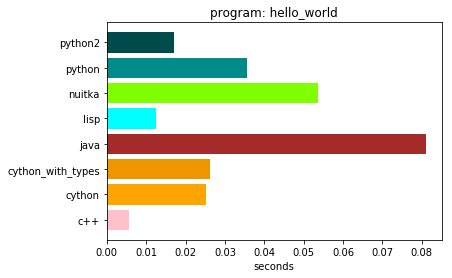

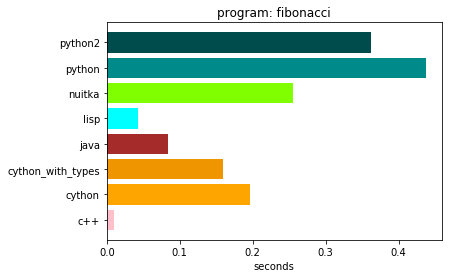

In [5]:
for result in results:
    plot_result(**result)